In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv('C:\\Users\\win8.1\\Desktop\\Case_Onsite_Modeling_Wine\\wine_dataset.csv')


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [3]:
X = data.drop('quality', axis=1)
y = data['quality']


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((5197, 12), (5197,), (1300, 12), (1300,))

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM_rbf', SVC()))
models.append(('SVM_linear', SVC(kernel='linear')))

In [8]:
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, X_train, y_train, 
                                       cv=10, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(X_train, y_train)
    cv_test_results = accuracy_score(y_test, clf.predict(X_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)

C:\Users\win8.1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ValueError: could not convert string to float: 'white'

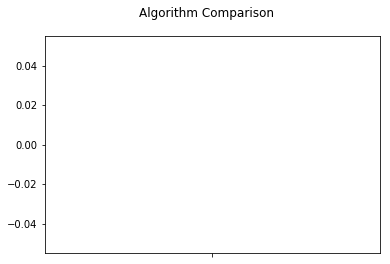

In [9]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
RF = RandomForestClassifier(random_state=seed)
RF.fit(X_train, y_train)

In [10]:
names = list(X_train.columns.values)
importances = RF.feature_importances_
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
y_pos = np.arange(len(names))
plt.bar(y_pos, importances, align='center')
plt.xticks(y_pos, names, rotation=90)
plt.show()


NameError: name 'RF' is not defined

In [11]:
clf = RandomForestClassifier()
grid_values = {'max_features':['auto','sqrt','log2'],'max_depth':[None, 10, 5, 3, 1],
              'min_samples_leaf':[1, 5, 10, 20, 50]}
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
grid_clf = GridSearchCV(clf, param_grid=grid_values, cv=10, scoring='accuracy')
grid_clf.fit(X_train, y_train) # fit and tune model

C:\Users\win8.1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ValueError: could not convert string to float: 'white'

In [13]:
grid_clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [14]:
clf = RandomForestClassifier().fit(X_train, y_train)

ValueError: could not convert string to float: 'white'

In [15]:
y_pred = clf.predict(X_test)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [16]:
print('Training Accuracy :: ', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy :: ', accuracy_score(y_test, y_pred))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [17]:
print(confusion_matrix(y_test, y_pred))

NameError: name 'y_pred' is not defined